# LIBRARIES 

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
import ast, os

# LABELLING 

# ast - abstract syntax tree - analysis tool

# literal_eval - identifying data type of the content in a file by traversing through the nodes of the tree

In [3]:
model = load_model('watermark_mobilenetmodel.h5')#loading model into model parameter
f = open("mobilenet_watermark_class_indices.txt", "r")#opening currency classes text file
labels = f.read()#reading the text file into labels parameter
labels = ast.literal_eval(labels)
final_labels = {v: k for k, v in labels.items()}#interchanging and printing the values as label:class instead of class:label
print(final_labels.keys())#key values-labels for classes

dict_keys([0, 1])


# PREDICTING THE IMAGE

# load_img-loads image into PIL(Python Imaging Library) format-provides the python interpreter with image editing capabilities.

# asarray-converts input to array-returns an array

# np.expand_dims-expand shape of an array

# result_dict[final_labels[key]] = result[0][key] - mapping every value of result array to the classes in final_label dictionary (final_labels[key]-gives values of respective keys from dictionary)

# dict.items()-returns tuple of key value pairs

# sorted() -used to sort dictionary

# key - supports a inline function-here it returns item[1] as item which in this case probability values beside every class name({class-items[0]:prob-items[1]})

# based on item[1] the dictionary is sorted with reverse =true which is in descending order

# sorted_results.keys()-key values(class names) of sorted_result dict

# sorted_results[list(sorted_results.keys())[0]] - retriving the value of the first element in the list which contains key values

1/1 [==============================] - 1s 1s/step
Currency note:  yes_watermark


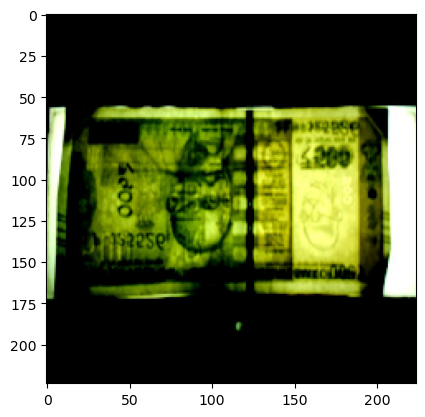

In [4]:
def predict_image(imgname, from_test_dir):
    
    test_image = tf.keras.utils.load_img(imgname, target_size = (224, 224))#image dim=224X224
    plt.imshow(test_image)

    test_image = np.asarray(test_image)
    
    #axis increase number of dimensions of array-axis=0-vertically-rows
    test_image = np.expand_dims(test_image, axis=0)
    
    test_image = (2.0 / 255.0) * test_image - 1.0 #normalizing the values of images
    
    #passing the normalized image to our model for prediction
    result = model.predict(test_image)
    
    result_dict = dict()#creating a dictionary
    
    for key in list(final_labels.keys()): #each keys of final labels dict
        result_dict[final_labels[key]] = result[0][key]
        
    #sorting dictionary based on probability values in descending order   
    sorted_results = {k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1], reverse=True)}
    
    if not from_test_dir:#if False is passed 
        for label in sorted_results.keys():#each class name from sorted dictionary
            
# printing each class name(key) and its value by multiplying its value to 100 to achieve probability percentage in that format 
            print("{}: {}%".format(label, sorted_results[label] * 100))
    
    final_result = dict() #creating a dictionary 
    
    #creating and mapping the 1st key value pair into new dict
    final_result[list(sorted_results.keys())[0]] = sorted_results[list(sorted_results.keys())[0]] * 100
    
    return final_result

note = predict_image('..\\test-images\\yesww.jpg', True)
watermark_currency=list(note.keys())[0]#retriving that class name from dictionary
print("Currency note: ",watermark_currency)

# VALIDATING TEST DIRECTORY

# true-only prints class with highest probability
# false-prints all classes with probabilities
# calling predict image directory and returns result to prediction parameter
# prediction is returned in dictionary form hence we check key value in that dict with currency string

1/1 [==============================] - 0s 77ms/step
no_watermark\14973.jpg: CORRECT PREDICTION {'no_watermark': 99.99593496322632}
Predicted note:  no_watermark
Orginal note: no_watermark
1/1 [==============================] - 0s 80ms/step
no_watermark\1598521.jpg: CORRECT PREDICTION {'no_watermark': 99.97153878211975}
Predicted note:  no_watermark
Orginal note: no_watermark
1/1 [==============================] - 0s 75ms/step
no_watermark\1763665.jpg: CORRECT PREDICTION {'no_watermark': 99.96538162231445}
Predicted note:  no_watermark
Orginal note: no_watermark
1/1 [==============================] - 0s 81ms/step
no_watermark\2678095.jpg: CORRECT PREDICTION {'no_watermark': 99.58711266517639}
Predicted note:  no_watermark
Orginal note: no_watermark
1/1 [==============================] - 0s 94ms/step
no_watermark\3220384.jpg: CORRECT PREDICTION {'no_watermark': 99.88073110580444}
Predicted note:  no_watermark
Orginal note: no_watermark
1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 72ms/step
yes_watermark\high-contrast500.jpg: CORRECT PREDICTION {'yes_watermark': 99.31721687316895}
Predicted note:  yes_watermark
Orginal note: yes_watermark
1/1 [==============================] - 0s 68ms/step
yes_watermark\high-contrast500back.jpg: CORRECT PREDICTION {'yes_watermark': 99.9683141708374}
Predicted note:  yes_watermark
Orginal note: yes_watermark
1/1 [==============================] - 0s 72ms/step
yes_watermark\high-contrast500backr.jpg: CORRECT PREDICTION {'yes_watermark': 99.89930987358093}
Predicted note:  yes_watermark
Orginal note: yes_watermark
1/1 [==============================] - 0s 71ms/step
yes_watermark\high-contrast500r.jpg: CORRECT PREDICTION {'yes_watermark': 99.83763694763184}
Predicted note:  yes_watermark
Orginal note: yes_watermark
1/1 [==============================] - 0s 72ms/step
yes_watermark\high-contrast50old.jpg: CORRECT PREDICTION {'yes_watermark': 95.49121260643005}
Predicted note:  yes_watermark
Or

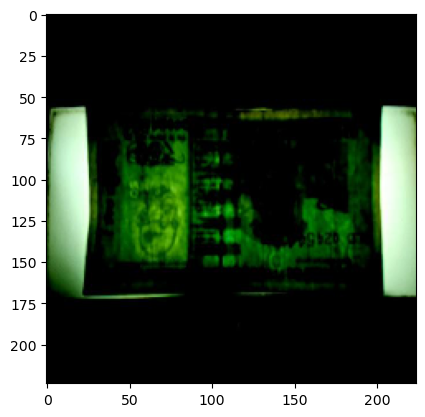

In [5]:
def verify_test_dir():
    path = '..\\batch-test-images' #path of test directory
    
    #list of all folders in test dir will be stored in folders array
    folders = os.listdir(path) 

    correct_preds = 0
    file_count = 0
    
    for fold in folders: #taking each folder into fold parameter
        
        #list of all files in the selected folder will be stored in files array
        files = os.listdir(path + '\\' + fold)
        
        for filename in files:#taking each name of file into filename parameter
            
            watermark_string = fold #folder name 
            prediction = predict_image(path + '\\{}\\'.format(fold) + filename, True)
            
            if list(prediction.keys())[0] == watermark_string:
                
                #filename along with its prediction probability
                print("{}\{}: CORRECT PREDICTION".format(fold, filename), prediction)
                print("Predicted note: ",list(prediction.keys())[0])#predicted note
                print("Orginal note:",watermark_string)#orginal note
                correct_preds += 1
            else:
                print("{}\{}: INCORRECT PREDICTION".format(fold, filename), prediction)
                print("Predicted note: ",list(prediction.keys())[0])
                print("Orginal note:", watermark_string)
            file_count += 1

    acc=(correct_preds/file_count)*100 #accuracy
    print('accuracy:',acc)
verify_test_dir()

# COMPLETE CODE

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
import ast, os

model = load_model('watermark_mobilenetmodel.h5')
f = open("mobilenet_watermark_class_indices.txt", "r")
labels = f.read()
labels = ast.literal_eval(labels)
final_labels = {v: k for k, v in labels.items()}


def predict_image(imgname, from_test_dir):
    #test_image = image.load_img(imgname, target_size = (224, 224))
    
    test_image = tf.keras.utils.load_img(imgname, target_size = (224, 224))
    # plt.imshow(test_image)
    # plt.show()

    test_image = np.asarray(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = (2.0 / 255.0) * test_image - 1.0
    result = model.predict(test_image)

    result_dict = dict()
    for key in list(final_labels.keys()):
        result_dict[final_labels[key]] = result[0][key]
    sorted_results = {k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1], reverse=True)}

    if not from_test_dir:
        print('=' * 50)
        for label in sorted_results.keys():
            print("{}: {}%".format(label, sorted_results[label] * 100))

    final_result = dict()
    final_result[list(sorted_results.keys())[0]] = sorted_results[list(sorted_results.keys())[0]] * 100

    return final_result

def verify_test_dir():
    path = '..\\batch-test-images'
    folders = os.listdir(path)

    correct_preds = 0
    file_count = 0
    for fold in folders:
        files = os.listdir(path + '\\' + fold)
        for filename in files:
            final_string = fold
            prediction = predict_image(path + '\\{}\\'.format(fold) + filename, True)
            if list(prediction.keys())[0] == final_string:
                print("{}\{}: Correct Prediction".format(fold, filename), prediction)
                correct_preds += 1
            else:
                print("{}\{}: INCORRECT PREDICTION".format(fold, filename), prediction)
            file_count += 1

    print(correct_preds, file_count)


print('=' * 50)
final_result = predict_image('..\\test-images\\yesww.jpg', False)
print("Final Result: ", final_result)
verify_test_dir()